In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_tv = pd.read_csv('/content/TV_Final.csv')

In [ ]:
df_tv.shape

(912, 7)

In [ ]:
df_tv.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [ ]:
 df_tv.drop(columns=['Original Price'],axis=1,inplace=True)

In [ ]:
df_tv.shape

(912, 6)

In [ ]:
df_tv.head()

,Brand,Resolution,Size,Selling Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,Android,4.4
2,realme,HD LED,32,13999,Android,4.3
3,Mi,HD LED,32,14999,Android,4.4
4,realme,HD LED,32,12999,Android,4.3


In [ ]:
df_tv.columns

Index(['Brand', 'Resolution', 'Size ', 'Selling Price', 'Operating System',
       'Rating'],
      dtype='object')

In [ ]:
df_tv.columns = df.columns.str.strip()

In [ ]:
df_tv.columns

Index(['Brand', 'Resolution', 'Size', 'Price', 'Operating System', 'Rating'], dtype='object')

In [ ]:
df_tv.rename(columns={'Selling Price': 'Price'}, inplace=True)

In [ ]:
df_tv.head()

,Brand,Resolution,Size,Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,Android,4.4
2,realme,HD LED,32,13999,Android,4.3
3,Mi,HD LED,32,14999,Android,4.4
4,realme,HD LED,32,12999,Android,4.3


In [ ]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Price             912 non-null    int64  
 4   Operating System  901 non-null    object 
 5   Rating            692 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 42.9+ KB


In [ ]:
df_tv.isnull().sum()

,0
Brand,0
Resolution,0
Size,0
Price,0
Operating System,11
Rating,220


In [ ]:
df_tv.duplicated().sum()

33

In [ ]:
# Find the number of duplicates per column
duplicate_counts = df_tv.apply(lambda x: x.duplicated().sum())

# Print the number of duplicates for each column
print("Duplicate values per column (Before removing duplicates):")
print(duplicate_counts[duplicate_counts > 0])  # Show only columns with duplicates


Duplicate values per column (Before removing duplicates):
Brand               853
Resolution          907
Size                885
Price               397
Operating System    904
Rating              886
dtype: int64


In [ ]:
df_tv.drop_duplicates(inplace=True)

In [ ]:
df_tv.duplicated().sum()

0

In [ ]:
# Find the number of duplicates per column after removing duplicate rows
duplicate_counts_cleaned = df_tv.apply(lambda x: x.duplicated().sum())

# Print the number of duplicates for each column after removing duplicates
print("Duplicate values per column (After removing duplicates):")
print(duplicate_counts_cleaned[duplicate_counts_cleaned > 0])  # Show only columns with duplicates


Duplicate values per column (After removing duplicates):
Brand               820
Resolution          874
Size                852
Price               364
Operating System    871
Rating              853
dtype: int64


<ipython-input-167-b565fd12aefa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

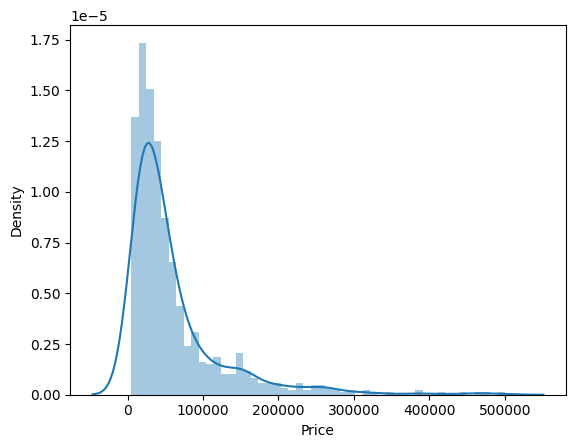

In [ ]:
sns.distplot(df_tv['Price'])

<Axes: xlabel='Price'>

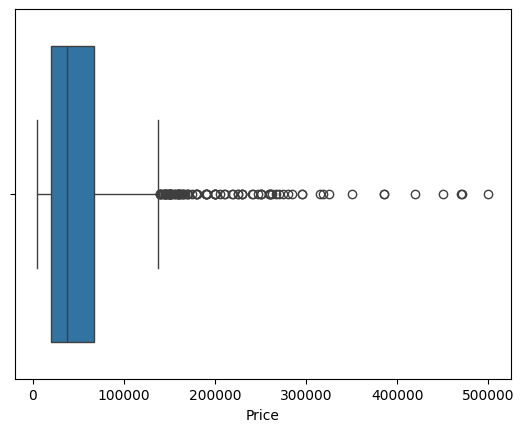

In [ ]:
sns.boxplot(df_tv['Price'],orient='h')

In [ ]:
#finding the iqr
percentile25 = df_tv['Price'].quantile(0.25)
percentile75 = df_tv['Price'].quantile(0.75)

In [ ]:
percentile25

19999.0

In [ ]:
percentile75

66999.0

In [ ]:
iqr = percentile75-percentile25

In [ ]:
iqr

47000.0

In [ ]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [ ]:
print('Upper_limit',upper_limit)
print('Lower_limit',lower_limit)

Upper_limit 137499.0
Lower_limit -50501.0


In [ ]:
#finding outliers
df_tv[df_tv['Price']>upper_limit]
df_tv[df_tv['Price']<lower_limit]

,Brand,Resolution,Size,Price,Operating System,Rating


In [ ]:
#Trimming
df_tv = df_tv[(df_tv['Price']<upper_limit)&(df_tv['Price']>lower_limit)]

<Axes: xlabel='Price'>

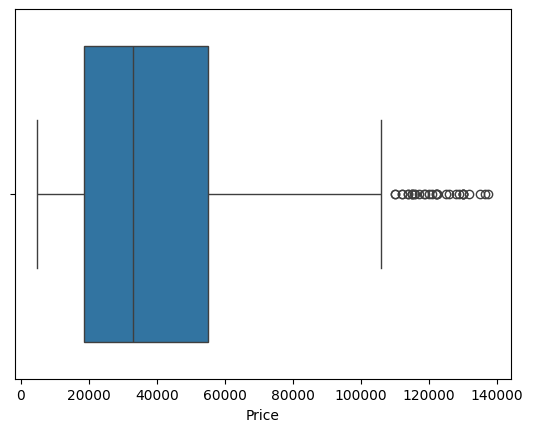

In [ ]:
sns.boxplot(df_tv['Price'],orient='h')

In [ ]:
df_tv.shape

(784, 6)

<ipython-input-180-b565fd12aefa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

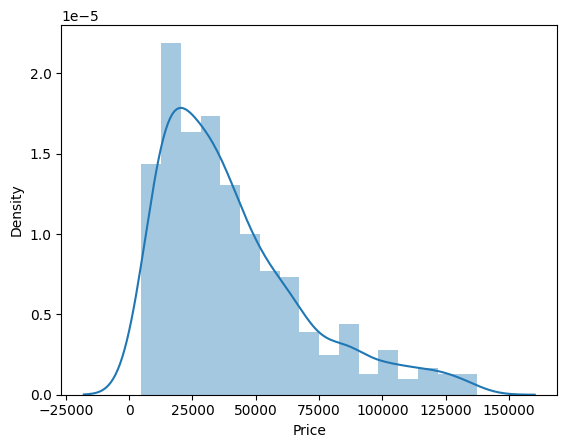

In [ ]:
sns.distplot(df_tv['Price'])

<ipython-input-181-3ba77f5c534a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_tv['Price']))


<Axes: xlabel='Price', ylabel='Density'>

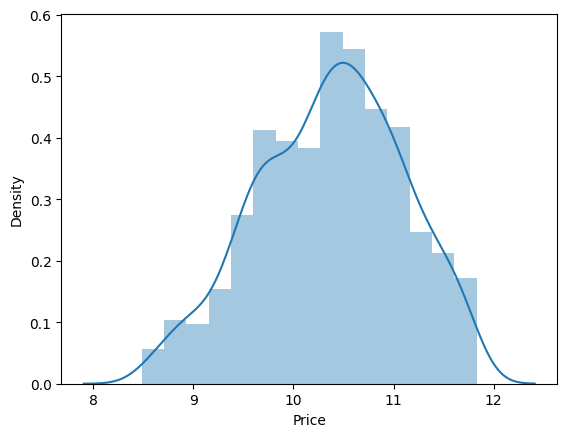

In [ ]:
sns.distplot(np.log(df_tv['Price']))

In [ ]:
df_tv.corr(numeric_only=True)['Price']

,Price
Size,0.744463
Price,1.000000
Rating,0.221917


<Axes: xlabel='Brand'>

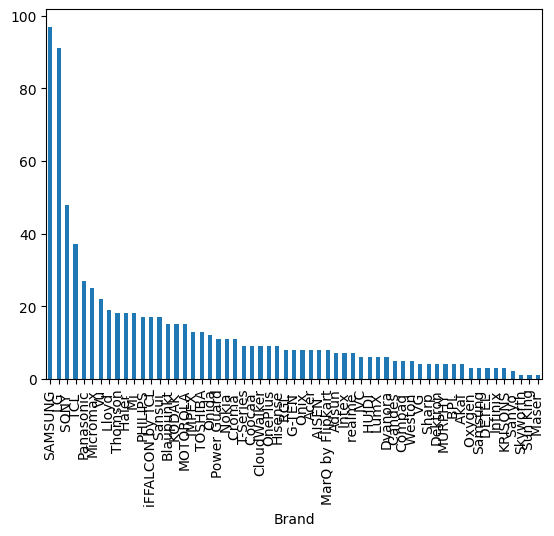

In [ ]:
 df_tv['Brand'].value_counts().plot(kind='bar')

In [ ]:
 df_tv['Brand'].unique()

array(['TOSHIBA', 'TCL ', 'realme ', 'Mi ', 'OnePlus', 'Hisense', 'LG ',
       'MarQ by Flipkart', 'iFFALCON by TCL', 'Coocaa ', 'SAMSUNG',
       'Infinix', 'Vu', 'Nokia ', 'Thomson', 'SONY ', 'KODAK ',
       'MOTOROLA', 'PHILIPS', 'Acer', 'Blaupunkt', 'Adsun', 'T-Series',
       'Panasonic', 'Micromax', 'Sansui ', 'Croma ', 'Candes ', 'Dyanora',
       'Haier ', 'Onida', 'RGL ', 'Lloyd ', 'LumX ', 'Onix ', 'IMPEX ',
       'BPL ', 'CloudWalker', 'Oxygen ', 'Power Guard', 'Akai ', 'VG ',
       'Sun King', 'Compaq ', 'HUIDI ', 'Intex ', 'DETEL ', 'JVC',
       'G-TEN ', 'Skyworth', 'Maser ', 'Sanyo ', 'MURPHY ', 'Samsung',
       'Dektron', 'Sharp ', 'KRISONS', 'Weston ', 'AISEN  '], dtype=object)

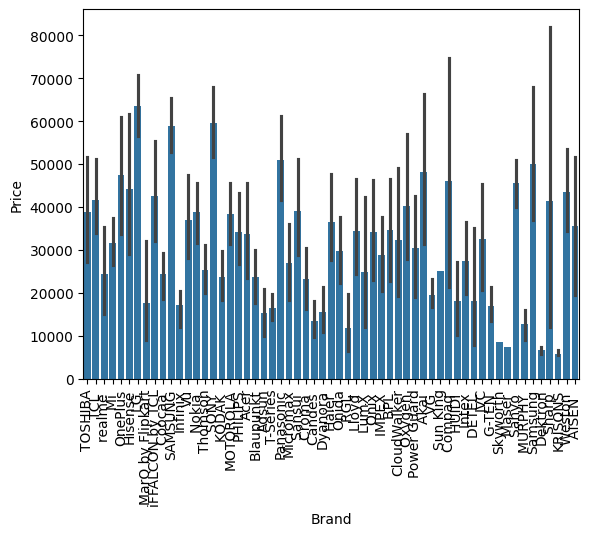

In [ ]:
sns.barplot(x=df_tv['Brand'],y=df_tv['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Resolution'>

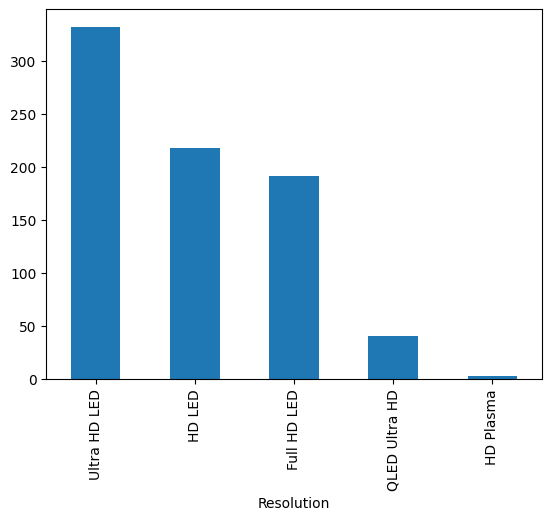

In [ ]:
df_tv['Resolution'].value_counts().plot(kind='bar')

In [ ]:
df_tv['Resolution'].unique()

array(['Ultra HD LED', 'QLED Ultra HD', 'HD LED', 'Full HD LED',
       'HD Plasma'], dtype=object)

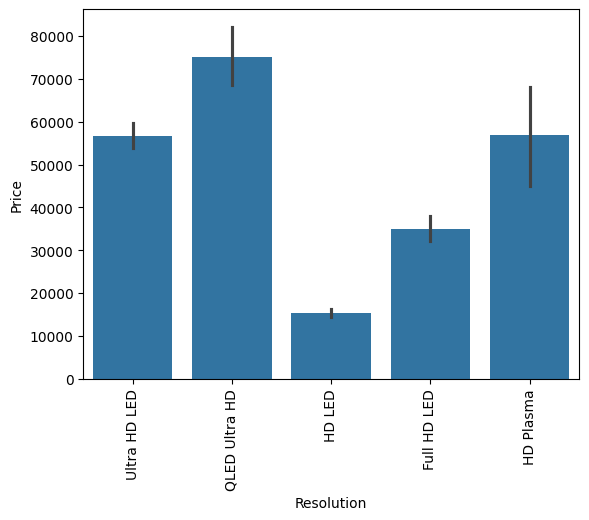

In [ ]:
sns.barplot(x=df_tv['Resolution'],y=df_tv['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Size'>

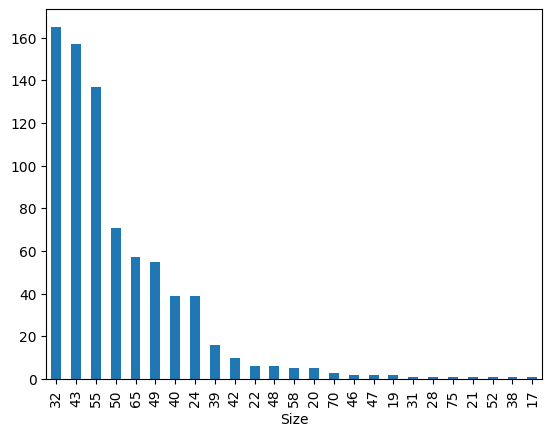

In [ ]:
 df_tv['Size'].value_counts().plot(kind='bar')

In [ ]:
 df_tv['Size'].unique()

array([55, 32, 43, 65, 40, 50, 70, 24, 42, 58, 49, 39, 48, 31, 28, 75, 20,
       22, 21, 52, 46, 47, 19, 38, 17])

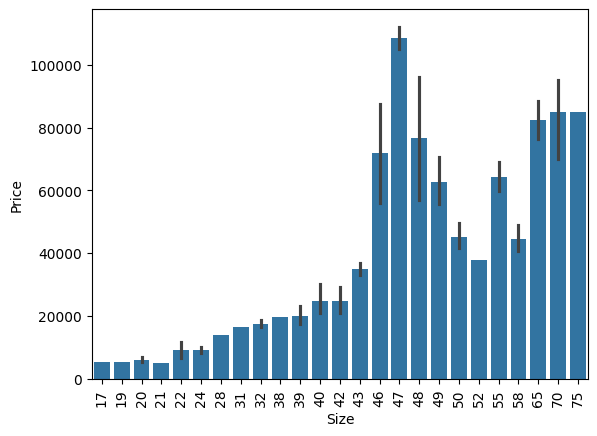

In [ ]:
sns.barplot(x=df_tv['Size'],y=df_tv['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Operating System'>

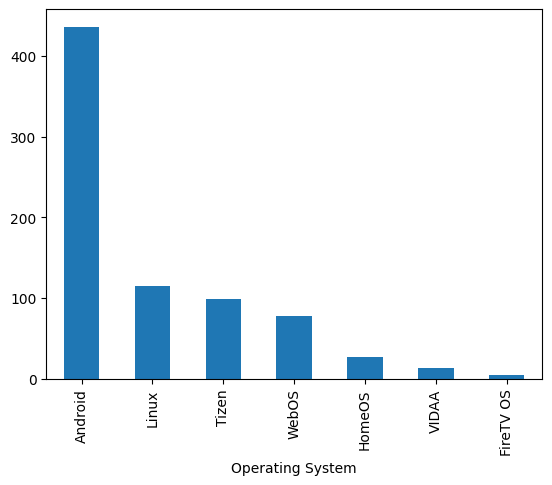

In [ ]:
df_tv['Operating System'].value_counts().plot(kind='bar')

In [ ]:
df_tv['Operating System'].unique()

array(['VIDAA', 'Android', 'Linux', nan, 'Tizen', 'WebOS', 'HomeOS',
       'FireTV OS'], dtype=object)

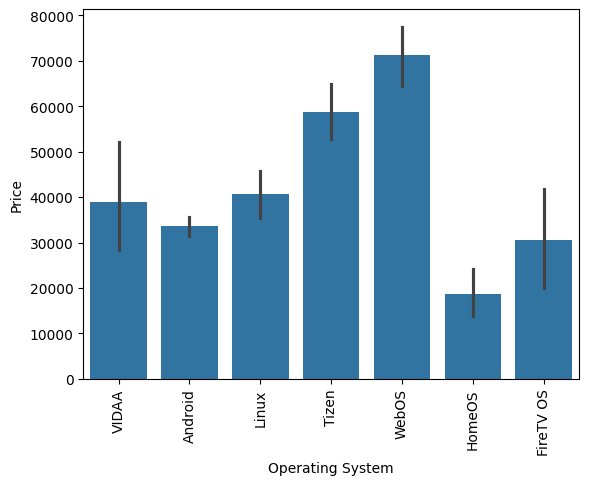

In [ ]:
sns.barplot(x=df_tv['Operating System'],y=df_tv['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Rating'>

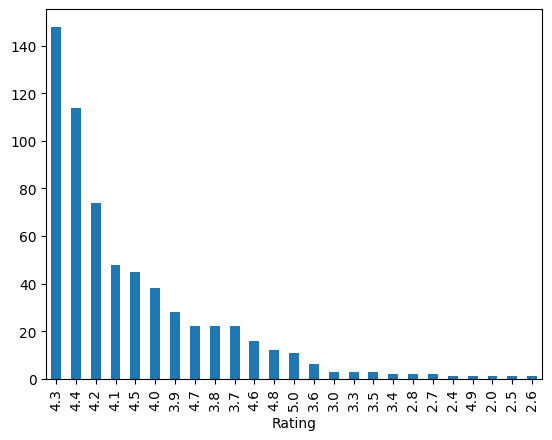

In [ ]:
df_tv['Rating'].value_counts().plot(kind='bar')

In [ ]:
df_tv['Rating'].unique()

array([4.3, 4.4, 4.2, 4.1, 4.5, 3.9, 4. , 3.6, 4.7, 3.8, 4.8, 4.6, nan,
       3.5, 5. , 2.7, 3.7, 4.9, 3.4, 2.8, 2.4, 3. , 2. , 3.3, 2.5, 2.6])

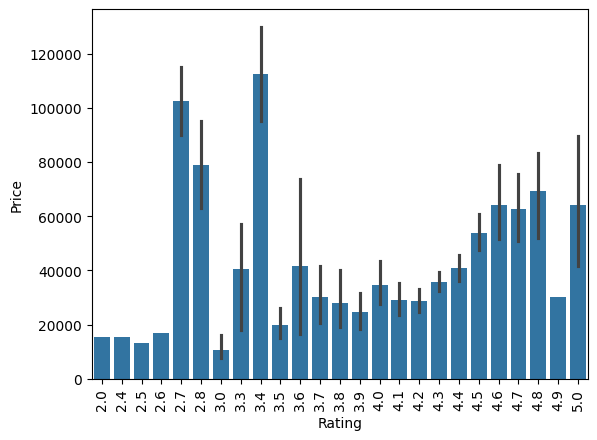

In [ ]:
sns.barplot(x=df_tv['Rating'],y=df_tv['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_tv.head()

,Brand,Resolution,Size,Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,Android,4.4
2,realme,HD LED,32,13999,Android,4.3
3,Mi,HD LED,32,14999,Android,4.4
4,realme,HD LED,32,12999,Android,4.3


In [ ]:
X=df_tv.drop(columns=['Price'])
y=df_tv['Price']

In [ ]:
X

,Brand,Resolution,Size,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,VIDAA,4.3
1,TCL,QLED Ultra HD,55,Android,4.4
2,realme,HD LED,32,Android,4.3
3,Mi,HD LED,32,Android,4.4
4,realme,HD LED,32,Android,4.3
...,...,...,...,...,...
906,SONY,Ultra HD LED,49,Linux,4.6
907,SONY,Full HD LED,43,Linux,4.4
908,SONY,Full HD LED,40,Linux,4.6
910,SONY,HD LED,32,Linux,4.4


In [ ]:
X.columns

Index(['Brand', 'Resolution', 'Size', 'Operating System', 'Rating'], dtype='object')

In [ ]:
y

,Price
0,37999
1,52999
2,13999
3,14999
4,12999
...,...
906,54999
907,44999
908,41499
910,32900


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((627, 5), (157, 5), (627,), (157,))

In [ ]:
X_train.head()

,Brand,Resolution,Size,Operating System,Rating
887,Sharp,Full HD LED,40,Linux,NaN
133,Hisense,Ultra HD LED,58,Android,4.4
765,Haier,Full HD LED,42,Android,5.0
55,Thomson,Full HD LED,40,Android,4.4
483,LG,Ultra HD LED,43,WebOS,4.4


In [ ]:
X.columns

Index(['Brand', 'Resolution', 'Size', 'Operating System', 'Rating'], dtype='object')

#RandomForestRegressor

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Step 1: Preprocessing with ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='mean'), [4]),  # Numerical features: Size, Rating
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), [3])  # Categorical features: Brand, Resolution, Operating System
], remainder='passthrough')

# Step 2: One-Hot Encoding for Categorical Features
# After step1, categorical features are at indices [1, 2, 3]
step2 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', dtype=np.int64), [1, 2, 3])  # Corrected indices
], remainder='passthrough')

# Step 3: RandomForestRegressor
step3 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Creating the Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7533775660974252
MAE: 9549.324076028593


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

# Step 1: Preprocessing with ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='mean'), [4]),  # Numerical features: Size, Rating
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), [3])  # Categorical features: Brand, Resolution, Operating System
], remainder='passthrough')

# Step 2: One-Hot Encoding for Categorical Features
# After step1, categorical features are at indices [1, 2, 3]
step2 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', dtype=np.int64), [1, 2, 3])  # Corrected indices
], remainder='passthrough')

# Step 3: LinearRegression
step3 = LinearRegression()

# Creating the Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.6982449491841056
MAE: 11005.191117039078


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Preprocessing with ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='mean'), [4]),  # Numerical features: Size, Rating
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), [3])  # Categorical features: Brand, Resolution, Operating System
], remainder='passthrough')

# Step 2: One-Hot Encoding for Categorical Features
# After step1, categorical features are at indices [1, 2, 3]
step2 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', dtype=np.int64), [1, 2, 3])  # Corrected indices
], remainder='passthrough')

# Step 3: DecisionTreeRegressor
step3 = DecisionTreeRegressor(max_depth=8)

# Creating the Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.737459751790636
MAE: 9588.567217633887


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#XGBRegressor

In [ ]:
from xgboost import XGBRegressor
# Step 1: Preprocessing with ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='mean'), [4]),  # Numerical features: Size, Rating
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), [3])  # Categorical features: Brand, Resolution, Operating System
], remainder='passthrough')

# Step 2: One-Hot Encoding for Categorical Features
# After step1, categorical features are at indices [1, 2, 3]
step2 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', dtype=np.int64), [1, 2, 3])  # Corrected indices
], remainder='passthrough')

# Step 3: XGBRegressor
step3 = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Creating the Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7860263586044312
MAE: 8928.86970665804


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Step 1: Preprocessing with ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='mean'), [4]),  # Numerical features: Size, Rating
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), [3])  # Categorical features: Brand, Resolution, Operating System
], remainder='passthrough')

# Step 2: One-Hot Encoding for Categorical Features
# After step1, categorical features are at indices [1, 2, 3]
step2 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', dtype=np.int64), [1, 2, 3])  # Corrected indices
], remainder='passthrough')

# Step 3:  GradientBoostingRegressor
step3 = GradientBoostingRegressor(n_estimators=500)

# Creating the Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7719085425623489
MAE: 9131.32365105846


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#Exporting the Model

In [ ]:
import pickle
# Serialize the pipeline
pickle.dump(pipe, open('pipe_model.pkl', 'wb'))

# Serialize the original DataFrame
pickle.dump(df, open('df_tv.pkl', 'wb'))


In [ ]:
!pip install streamlit -q

In [ ]:
! wget -q -O - ipv4.icanhazip.com

104.196.128.45


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.128.45:8501

your url is: https://thick-squids-fetch.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
  Stopping...
^C
